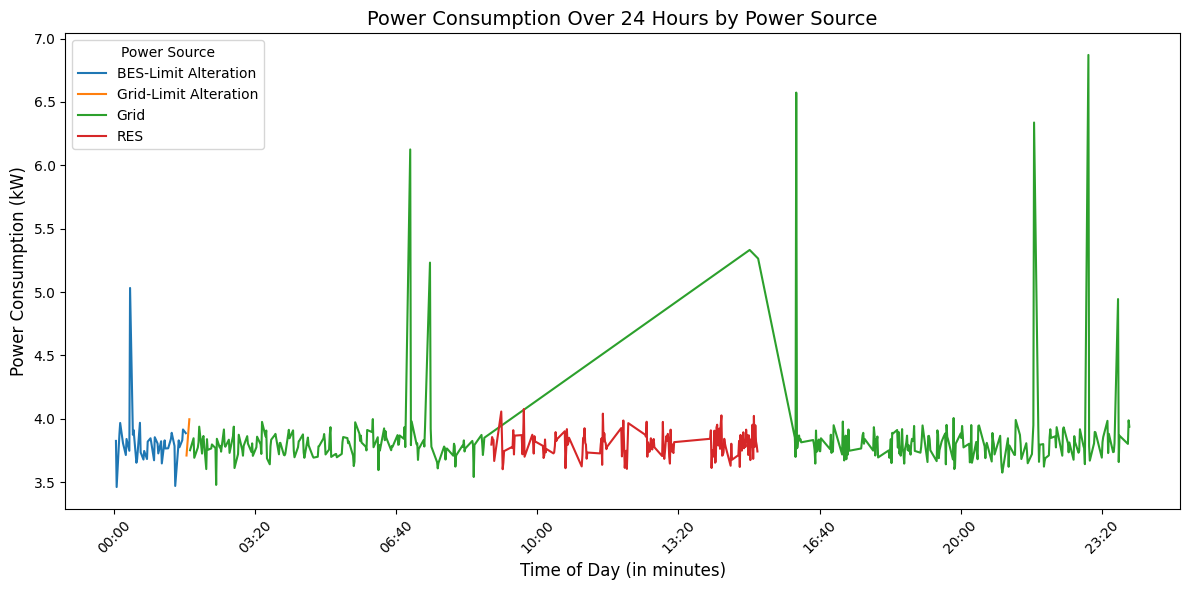

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is already loaded; replace with actual data loading if needed
merged_data = pd.read_csv('Optimizedusage.csv')  # Uncomment to load data

# Step 1: Ensure 'TIME' is treated as time-only (extract just the time if it's datetime)
merged_data['TIME'] = pd.to_datetime(merged_data['TIME'], errors='coerce').dt.time

# Step 2: Convert 'TIME' to minutes since midnight for numeric representation
merged_data['TIME_minutes'] = merged_data['TIME'].apply(lambda x: x.hour * 60 + x.minute if pd.notna(x) else None)

# Step 3: Drop rows where 'TIME_minutes' or 'Power_Source' is missing
merged_data = merged_data.dropna(subset=['TIME_minutes', 'Power_Source'])

# Step 4: Plot the Power_final for each Power_Source with different colors
plt.figure(figsize=(12, 6))

# Define a list of unique power sources and colors
power_sources = merged_data['Power_Source'].unique()
colors = plt.cm.tab10(range(len(power_sources)))  # Use a colormap for different colors

# Step 5: Loop through each power source and plot the data
for i, power_source in enumerate(power_sources):
    # Filter data for the current power source
    source_data = merged_data[merged_data['Power_Source'] == power_source]
    
    # Plot with a unique color for each power source
    plt.plot(source_data['TIME_minutes'], source_data['Power_final'], label=power_source, color=colors[i])

# Step 6: Customize the plot
plt.title('Power Consumption Over 24 Hours by Power Source', fontsize=14)
plt.xlabel('Time of Day (in minutes)', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)

# Format x-axis ticks to display hours:minutes
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x//60):02d}:{int(x%60):02d}'))

# Add a legend to differentiate power sources
plt.legend(title='Power Source')

# Step 7: Display the plot
plt.tight_layout()
plt.show()
